## Detecting Audio Deep Fakes sklearn

By: Alexander Comerford

In this notebook we will be using bispectral analysis features and classifiers to detect real vs. synthetic speech (deep fakes).

Throughout this notebook we will using high level libraries like scipy and stingray to calculate features from the raw audio signals to feed into a classifier to detect fake speech

### Overview

Deep fakes are the art of producing realistic human like data that is indistinguishable to humans through the modeling methods of deep learning.

With recent advances in machine learning, dramatic improvements to human like audio generated by machines are becoming more difficult to detect even by a trained ear.

Below we can hear a sample of one such model [WaveNet](https://deepmind.com/blog/wavenet-generative-model-raw-audio/)

In [4]:
from IPython import display

In [5]:
display.Audio("https://storage.googleapis.com/deepmind-media/pixie/us-english/wavenet-1.wav")

We can also listen to more modern models that are sensative to intonation by punctuation. Namely [tacotron2](https://google.github.io/tacotron/publications/tacotron2/)

In [6]:
display.Audio("https://google.github.io/tacotron/publications/tacotron2/demos/ghome_comma.wav")

Due to the relative realness of these synthetic audio clips, it comes into question how can we discern between human and robot in an automatic fashion without aid from the human ear. This type of automatic detection is what we will accomplish in this notebook.

### Overview

Throughout the rest of this notebook we will develop a detection method for these deep fakes against human synthesized audio using techniques in bispectral analysis shown [here](http://www.cs.albany.edu/~lsw/papers/cvprw19b.pdf).

We will create functions to compute a small representation of the bicoherence for a signal and utilize features extracted from this bicoherence to classify audio as either real or synthetic

### Imports

Below we will import all the libraries we need to do this analysis. Specifically we will be using tensorflow 2 to do our computations than the traditional numpy

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
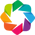

In [7]:
from math import *
import numpy as np
import tensorflow as tf
from scipy.io import wavfile
from scipy.linalg import toeplitz

import os
import glob
from itertools import product
from functools import lru_cache, reduce
import nbformat
from IPython import display
import ipywidgets as widgets
from PIL import Image 

import base64
import pickle

from stingray import lightcurve
from stingray.bispectrum import Bispectrum

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import holoviews as hv
hv.extension('bokeh')
renderer = hv.renderer('bokeh')

## Creating bicohernce features

We are going to utilize the functionality of `stingray` to compute the bispectrum for us of which we will create our features. 

In [8]:
def sliding_window(a, window, step_size):
    # compute number of chunks
    num_chunks = ((len(a)-window)//step_size)+1
 
    # yield chunks
    for i in range(0,num_chunks*step_size,step_size):
        yield a[i:i+window]

This is a simple implementation to accumulate bispectal attributes. For a more fine grain implemtation see the accompanying notebook `DetectingAudioDeepFakes_TF2`.

In [9]:
def windowed_bicoherence_features(wav_filename, window=32, step_size=16):
    
    ## Read signal data
    fs, signal = wavfile.read(wav_filename)

    ## accumulator dict
    bs_accum = {
        "bispec_full_sum":0,
        "bispec":0,
        "bispec_mag_sum":0,
        "bispec_phase":0
    }
    
    ## calculate number of chunks to iter over
    chunks = ((len(signal)-window)//step_size)+1

    ## Iterate over chunks
    for chunk in sliding_window(signal, window, step_size):
        
        ## compute bispectrum
        lc = lightcurve.Lightcurve(np.arange(len(chunk)),chunk)
        bs = Bispectrum(lc)

        ## Aggregate useful attributes
        bs_accum["bispec_full_sum"] += bs.bispec
        bs_accum["bispec_mag_sum"] += bs.bispec_mag
        bs_accum["bispec_phase"] += bs.bispec_phase

        
    ## Normalize attributes
    bs_accum["bispec_normal"] = np.abs( bs_accum["bispec_full_sum"] ) /\
                                        bs_accum["bispec_mag_sum"]
    bs_accum["bispec_mag"] = np.abs(bs_accum["bispec_normal"])
    bs_accum["bispec_phase"] /= chunks
    bs_accum["bispec_phase"] = np.interp(bs_accum["bispec_phase"], 
                                         (bs_accum["bispec_phase"].min(), bs_accum["bispec_phase"].max()), 
                                         (0, 1))
    ## Output features
    return (bs_accum["bispec_mag"].mean(), 
            bs_accum["bispec_phase"].mean())

## Data collection

If you would like to skip collection, visualization and training go to `Embedding a model in a jupyter notebook` to load a pre trained model.

Now that we have our primary functions to do this computation, we will now create a data collection function
which we will provide a `glob` path for `.wav` files as the input format

In [170]:
dc_tts_glob    = ""
tacotron2_glob = ""
real_glob      = ""

dc_tts = [windowed_bicoherence_features(filename, window=32, step_size=16) \
          for filename in glob.glob(dc_tts_glob)]
tacotron2 = np.array([windowed_bicoherence_features(filename, window=32, step_size=16) \
                      for filename in glob.glob(tacotron2_glob)])
real = np.array([windowed_bicoherence_features(filename, window=32, step_size=16) \
                 for filename in glob.glob(real_glob)])        

## Collection and visualization

Using only two features (mean magnitude and phase of the bicoherence) we can visualize in 2 dimensions each recording done by a human or machine and observe that start to form slightly overlapping clusters 

In [17]:
def make_plot(title, with_label=True):
    return ((hv.Scatter(real, label='Human' if with_label else '') *\
             hv.Scatter(dc_tts, label='DC-TTS' if with_label else '') *\
             hv.Scatter(tacotron2, label='tacotron2' if with_label else ''))\
               .opts(
                   hv.opts.Scatter(
                       size=5,
                       width=800, 
                       height=800,
                       title=title,
                       fontsize={'title': 18, 'labels':18, 'xticks':10, 'yticks':10},
                       xlabel="mean magnitude (μ_M)",
                       ylabel="mean phase (μ_P)" if with_label else '')))

plot = make_plot("Mean bicoherence magnitude and phase")
display.HTML(renderer.static_html(plot))

## Training a deep fake classifier

Although we can see clusters, we need to quantify these clusters with a classifier to make a deep fake detector. We will be using an `SVM` with an `rbf` kernal as our classifier. As mentioned we will be using only 2 features to do this analysis

In [19]:
## Standardize classes
human = real
robot = np.concatenate([dc_tts, tacotron2],0)

## create X and y training mapping
X = np.concatenate([human, robot], 0)
X_norm = StandardScaler().fit_transform(X)
y = np.concatenate([np.ones(human.shape[0])*0, 
                    np.ones(robot.shape[0])*1])

In [20]:
## resolution for probability map
h = 0.01

## Boundaries of X and X_norm
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
x_norm_min, x_norm_max = X_norm[:, 0].min() - 0.5, X_norm[:, 0].max() + 0.5
y_norm_min, y_norm_max = X_norm[:, 1].min() - 0.5, X_norm[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_norm_min, x_norm_max, h),
                     np.arange(y_norm_min, y_norm_max, h))

## Train SVM
clf = SVC(gamma=0.12, C=50, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
Z = Z.reshape(xx.shape)

In [23]:
## Visualization of probability map
plot = make_plot("Mean bicoherence magnitude and phase") +\
        (hv.Image(Z[::-1], bounds=(x_min, y_min, x_max, y_max)).opts(cmap="RdBu", colorbar=True) *\
         make_plot("Mean bicoherence magnitude and phase over SVM probabilities", with_label=False))

display.HTML(renderer.static_html(plot))

## Metrics

To see how well our `SVM` performs we can score how well it performed we will use `sklearn`'s `classification_report`.

In [24]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       700
         1.0       0.96      0.98      0.97      1400

    accuracy                           0.96      2100
   macro avg       0.96      0.95      0.95      2100
weighted avg       0.96      0.96      0.96      2100



## Embedding a model in a jupyter notebook

One aspect of ensuring reproducable research is to keep procedures and artifacts self contained. In order to make sure we can keep this code and model in one file for ease of use, we will save our trained model in this current notebook.

Using the [`metadata`](https://nbformat.readthedocs.io/en/latest/format_description.html#metadata) attribute of cell ouputs we will place our pickled model into a cell output metadata to be loaded later. By default the pre trained  model is included in this notebook

## Restoring an embedded model

Included in this jupyter notebook is an SVM model trained on the bicoherence features of various real and synthetic audio. To save a new model to this notebook, do not run the cell marked `loader` and instead run the cell marked

In [38]:
## Javascript to get name and save
js = '''IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')'''
get_ipython().run_cell_magic("javascript", "", js)


## Get cell with embedded detector
def cell_with_tag(c, tag):
    if "tags" in c["metadata"]:
        if c["metadata"]["tags"][0] == tag:
            return True
    return False

def get_embeded_model(tag):
    ## Get full path of current notebook being run
    nb_full_path = os.path.join(os.getcwd(), nb_name)
    nb = nbformat.read(open(nb_full_path, encoding='utf-8'), as_version=4)

    ## Get cell with embedded model
    detector_cell = list(filter(lambda c:cell_with_tag(c, tag), nb.cells))[0]
    detector_str = detector_cell['outputs'][-1]['metadata'][tag].strip()
    
    return pickle.loads(base64.b64decode(detector_str))

loaded_clf = get_embeded_model(tag="detector")

<IPython.core.display.Javascript object>

In [39]:
def save_current_model(b=None, loaded=True):

    ## output model as metadata to embed in this notebook
    if loaded:
        display.display(0, metadata={
            "detector":base64.b64encode(pickle.dumps(loaded_clf)).decode("ascii")});
    else:
        display.display(0, metadata={
            "detector":base64.b64encode(pickle.dumps(clf)).decode("ascii")});

    ## Save notebook
    get_ipython().run_cell_magic("javascript", "", "IPython.notebook.save_notebook()")


curr = widgets.Button(description='Save trained model')
curr.on_click(lambda b:save_current_model(b, loaded=False))

loaded = widgets.Button(description='Save loaded model')
loaded.on_click(lambda b:save_current_model(b, loaded=False))

display.display(curr, loaded)
save_current_model()

Button(description='Save trained model', style=ButtonStyle())

Button(description='Save loaded model', style=ButtonStyle())

0

<IPython.core.display.Javascript object>

## Detecting audio deep fakes

Now that we have a classifyer to detect deep fakes from it's bicoherence we will classify a few audio samples provided in this repository

In [40]:
def is_deep_fake(clf, datum):
    
    ## Predict human with over 95% probability
    if (clf.predict([datum]) == 0) and \
       (clf.predict_proba([datum])[0][0] > 0.95):
        return "HUMAN"
    return "ROBOT"

In [41]:
model = clf # loaded_clf

SAMPLES_GLOB_DIR = "/mnt/samples/*wav"

for f in glob.glob(SAMPLES_GLOB_DIR):

    print("Detecting deep fake for file %s ..."%f)
    result = is_deep_fake(clf = clf,
                          datum = windowed_bicoherence_features(f))
    print("%s is a %s"%(f,result))

Detecting deep fake for file /mnt/samples/siri.wav ...
/mnt/samples/siri.wav is a ROBOT
Detecting deep fake for file /mnt/samples/dc_tts.wav ...
/mnt/samples/dc_tts.wav is a ROBOT
Detecting deep fake for file /mnt/samples/microsoft-mike.wav ...
/mnt/samples/microsoft-mike.wav is a ROBOT
Detecting deep fake for file /mnt/samples/me.wav ...
/mnt/samples/me.wav is a HUMAN
Detecting deep fake for file /mnt/samples/mary.wav ...
/mnt/samples/mary.wav is a ROBOT
Detecting deep fake for file /mnt/samples/tacotron2.wav ...
/mnt/samples/tacotron2.wav is a ROBOT
